# VISUALIZATION OF THE DIFFERENT ACTIVATION FUNCTIONS

## Dataset: Bank fraudulent transactions

### Description
We are going to work with a dataset from kaggle that contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv


## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## Auxiliar functions

In [2]:
# 60% train set, 20% test set, 20% validation set
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [3]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

## Read and visualize dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/creditcard.csv")

In [6]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


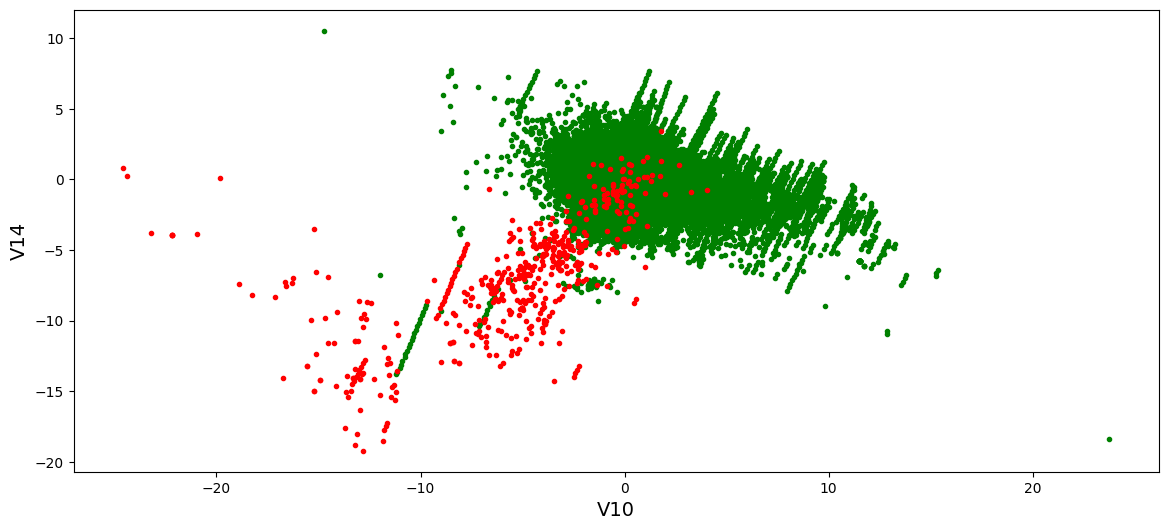

In [6]:
plt.figure(figsize=(14, 6))
plt.scatter(df["V10"][df['Class'] == 0], df["V14"][df['Class'] == 0], c="g", marker=".")
plt.scatter(df["V10"][df['Class'] == 1], df["V14"][df['Class'] == 1], c="r", marker=".")
plt.xlabel("V10", fontsize=14)
plt.ylabel("V14", fontsize=14)
plt.show()

## Dataset division

In [6]:
train_set, val_set, test_set = train_val_test_split(df)

In [7]:
X_train, y_train = remove_labels(train_set, 'Class')
X_val, y_val = remove_labels(val_set, 'Class')
X_test, y_test = remove_labels(test_set, 'Class')

## Activation functions

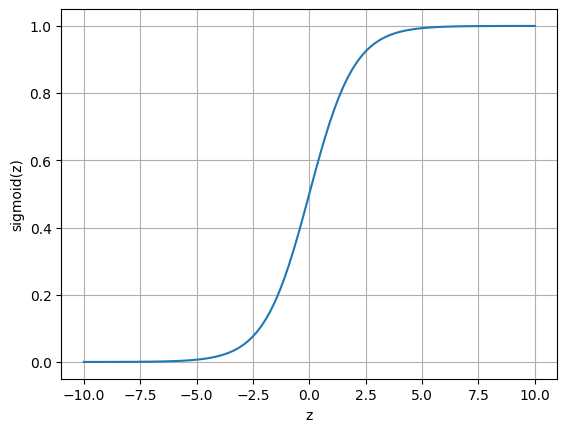

In [10]:
# sigmoid graphic representation

from tensorflow.keras.backend import sigmoid

z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid()
plt.show()

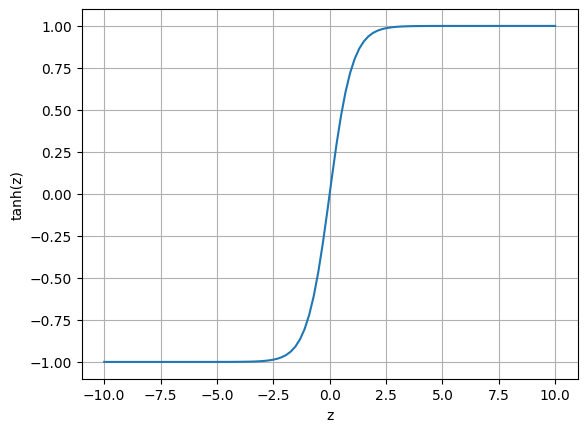

In [11]:
# tanh graphic representation

from tensorflow.keras.backend import tanh

z = np.linspace(-10, 10, 100)
plt.plot(z, tanh(z))
plt.xlabel("z")
plt.ylabel("tanh(z)")
plt.grid()
plt.show()

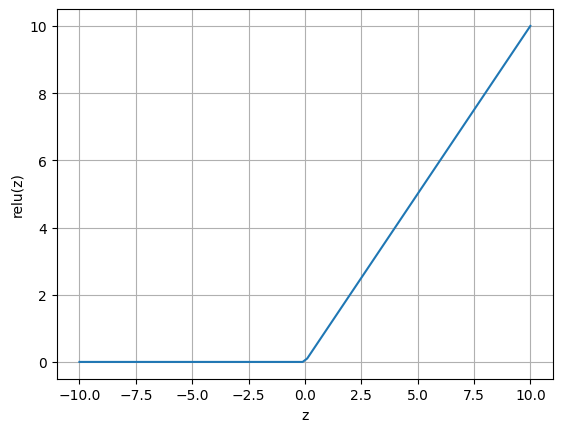

In [12]:
# relu graphical representation

from tensorflow.keras.backend import relu

z = np.linspace(-10, 10, 100)
plt.plot(z, relu(z))
plt.xlabel("z")
plt.ylabel("relu(z)")
plt.grid()
plt.show()

## ANN with 2-D data

In [8]:
# we keep the features V10 and V14
X_train_reduced = X_train[["V10", "V14"]].copy()
X_val_reduced = X_val[["V10", "V14"]].copy()
X_test_reduced = X_test[["V10", "V14"]].copy()

# 1. SIGMOID

In [9]:
# Neural network arquitecture

from tensorflow.keras import models
from tensorflow.keras import layers

activation = "sigmoid"

model = models.Sequential()
model.add(layers.Dense(128, activation=activation, input_shape=(X_train_reduced.shape[1],)))
model.add(layers.Dense(64, activation=activation))
model.add(layers.Dense(32, activation=activation))
model.add(layers.Dense(16, activation=activation))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 11265 (44.00 KB)
Trainable params: 11265 (44.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy', 'Precision'])

In [12]:
# Train the model and get the execution time to compare
import time
start_time = time.time()

history = model.fit(X_train_reduced,
                   y_train,
                   epochs=10,
                   validation_data=(X_val_reduced, y_val))

print("\n--- Execution time: {} sec ---".format(time.time() - start_time))

Epoch 1/10
5341/5341 [==============================] - 23s 4ms/step - loss: 0.0267 - accuracy: 0.9962 - precision: 0.0057 - val_loss: 0.0131 - val_accuracy: 0.9983 - val_precision: 0.0000e+00
Epoch 2/10
5341/5341 [==============================] - 20s 4ms/step - loss: 0.0131 - accuracy: 0.9982 - precision: 0.0000e+00 - val_loss: 0.0127 - val_accuracy: 0.9983 - val_precision: 0.0000e+00
Epoch 3/10
5341/5341 [==============================] - 15s 3ms/step - loss: 0.0129 - accuracy: 0.9982 - precision: 0.0000e+00 - val_loss: 0.0127 - val_accuracy: 0.9983 - val_precision: 0.0000e+00
Epoch 4/10
5341/5341 [==============================] - 15s 3ms/step - loss: 0.0129 - accuracy: 0.9982 - precision: 0.0000e+00 - val_loss: 0.0127 - val_accuracy: 0.9983 - val_precision: 0.0000e+00
Epoch 5/10
5341/5341 [==============================] - 18s 3ms/step - loss: 0.0129 - accuracy: 0.9982 - precision: 0.0000e+00 - val_loss: 0.0126 - val_accuracy: 0.9983 - val_precision: 0.0000e+00
Epoch 6/10
5341/534

Our dataset is highly unbalanced, we have more legitime transactions than fraudulent. Therefore the accuracy is not the best measue because even though I misclassify fraudulent transactions, since there are a lot of legitime transactions on the dataset, the accuracy is going to be good (it takes into account the FP and not the FN). That is why we have good accuracy but 0 precision.


In [13]:
hidden1 = model.layers[-1]

In [14]:
weights, biases = hidden1.get_weights()

In [15]:
weights

array([[-0.27957088],
       [-0.9343549 ],
       [-0.07359166],
       [-1.2047448 ],
       [-0.11042339],
       [-0.7656943 ],
       [-0.28574106],
       [-0.7241034 ],
       [ 0.07856197],
       [ 0.2975607 ],
       [ 0.21967171],
       [ 0.19875887],
       [-0.639943  ],
       [-0.5292174 ],
       [-0.81530386],
       [-1.0099047 ]], dtype=float32)

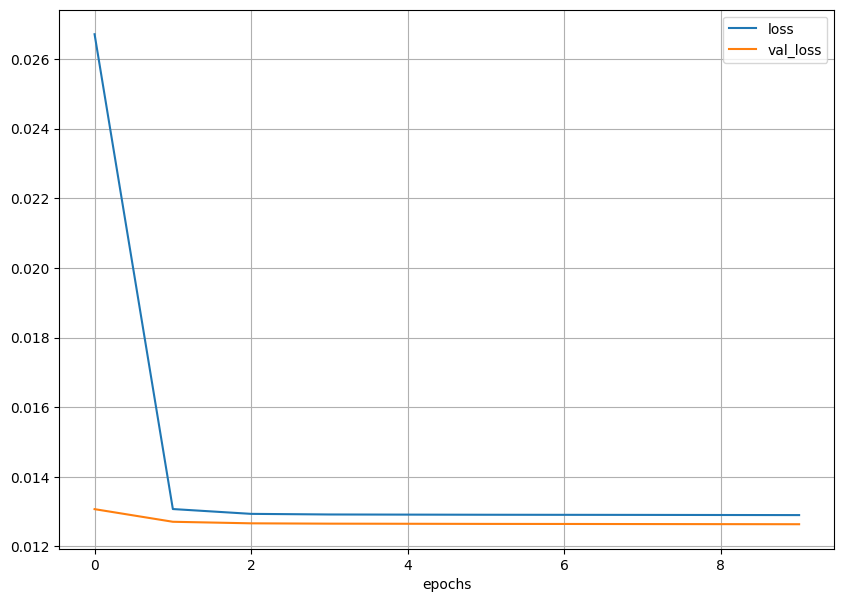

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()

**Limit decision boundary representation**

In [17]:
def plot_ann_decision_boundary(X, y, model, steps=1000):
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000

    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = labels.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap="RdBu", alpha=0.5)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'k.', markersize=2)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r.', markersize=2)
    plt.xlabel("V10", fontsize=14)
    plt.ylabel("V14", fontsize=14)

31250/31250 [==============================] - 62s 2ms/step


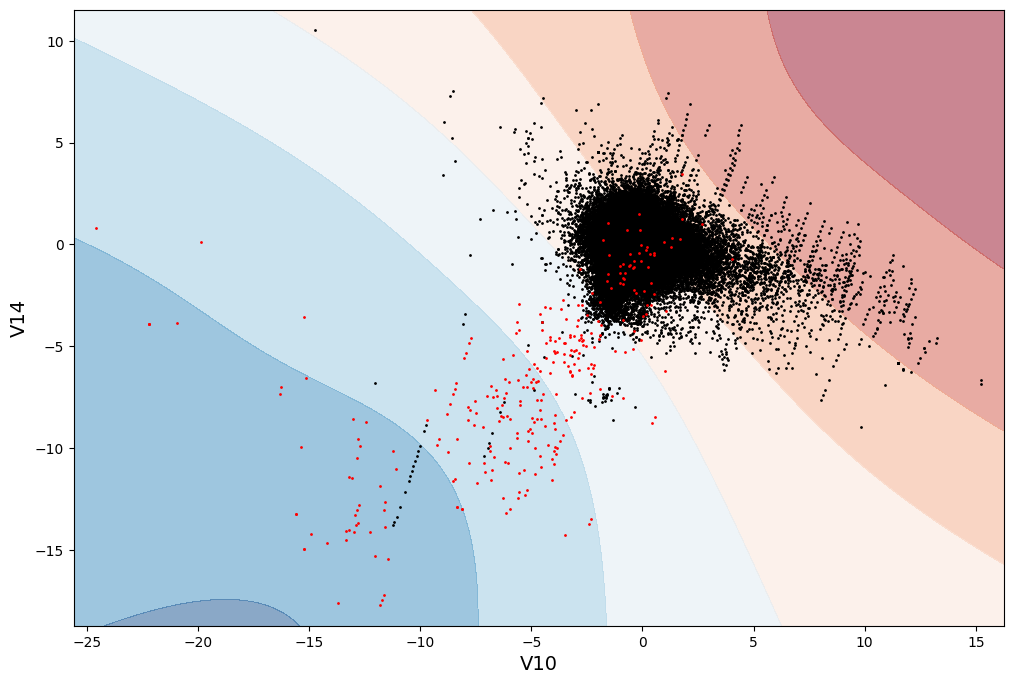

In [18]:
plt.figure(figsize=(12, 8))
plot_ann_decision_boundary(X_train_reduced.values, y_train, model)
plt.show()

**CONCLUSION**: When we use the sigmoid function as an activation function in a neural network and we have a lots of layer it can happen that it can be very slow or we can never converge into a solution. If we have one hidden layer it may be good enough.

# 2. TANH

In [19]:
# Neural network arquitecture

from tensorflow.keras import models
from tensorflow.keras import layers

activation = "tanh"

model2 = models.Sequential()
model2.add(layers.Dense(128, activation=activation, input_shape=(X_train_reduced.shape[1],)))
model2.add(layers.Dense(64, activation=activation))
model2.add(layers.Dense(32, activation=activation))
model2.add(layers.Dense(16, activation=activation))
model2.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model2.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy', 'Precision'])

In [21]:
# Train the model and get the execution time to compare
import time
start_time = time.time()

history2 = model2.fit(X_train_reduced,
                   y_train,
                   epochs=20,
                   validation_data=(X_val_reduced, y_val))

print("\n--- Execution time: {} sec ---".format(time.time() - start_time))

Epoch 1/20
5341/5341 [==============================] - 30s 5ms/step - loss: 0.0127 - accuracy: 0.9986 - precision: 0.6198 - val_loss: 0.0044 - val_accuracy: 0.9992 - val_precision: 0.8592
Epoch 2/20
5341/5341 [==============================] - 17s 3ms/step - loss: 0.0044 - accuracy: 0.9991 - precision: 0.7977 - val_loss: 0.0038 - val_accuracy: 0.9993 - val_precision: 0.8590
Epoch 3/20
5341/5341 [==============================] - 23s 4ms/step - loss: 0.0041 - accuracy: 0.9992 - precision: 0.8023 - val_loss: 0.0036 - val_accuracy: 0.9992 - val_precision: 0.8375
Epoch 4/20
5341/5341 [==============================] - 23s 4ms/step - loss: 0.0040 - accuracy: 0.9992 - precision: 0.8046 - val_loss: 0.0035 - val_accuracy: 0.9993 - val_precision: 0.8353
Epoch 5/20
5341/5341 [==============================] - 25s 5ms/step - loss: 0.0039 - accuracy: 0.9991 - precision: 0.7881 - val_loss: 0.0036 - val_accuracy: 0.9993 - val_precision: 0.8684
Epoch 6/20
5341/5341 [==============================] -

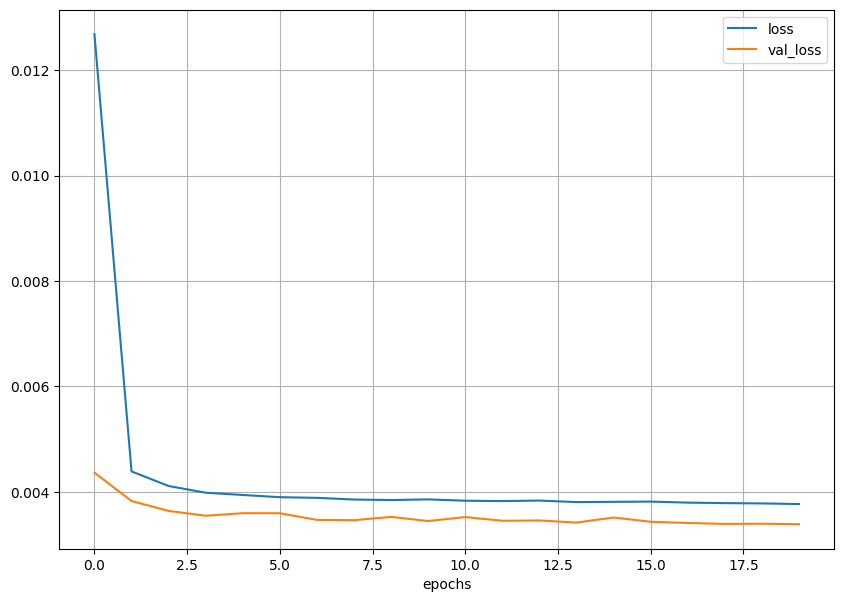

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame({'loss': history2.history['loss'],
              'val_loss': history2.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()

The error gets reduced drastically after the first epoch.

31250/31250 [==============================] - 52s 2ms/step


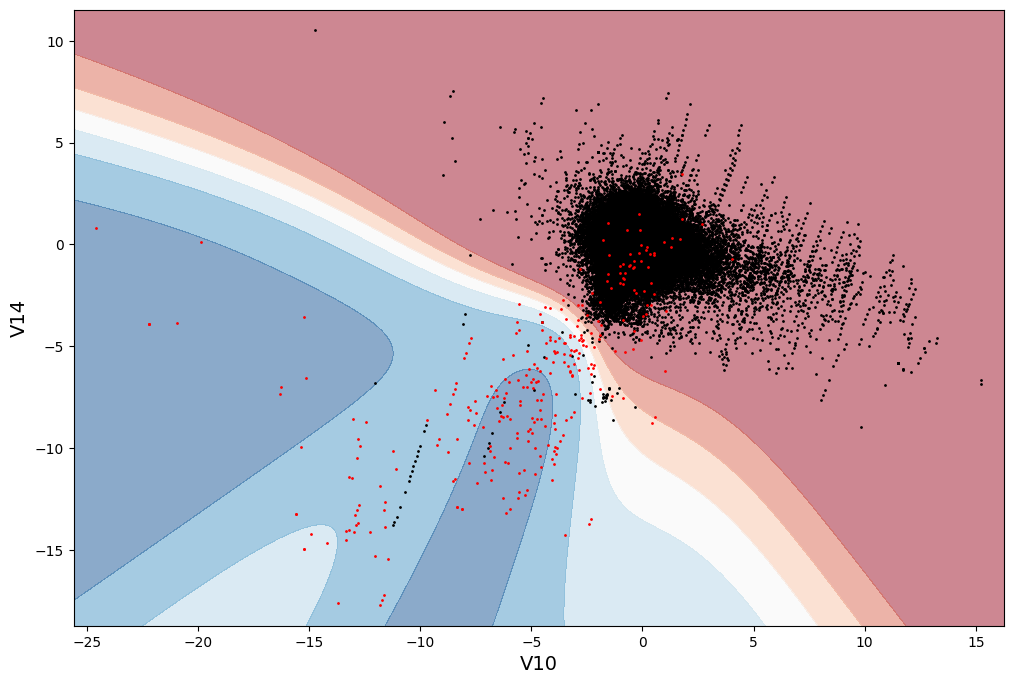

In [23]:
plt.figure(figsize=(12, 8))
plot_ann_decision_boundary(X_train_reduced.values, y_train, model2)
plt.show()

# 3. RELU

In [24]:
# Neural network arquitecture

from tensorflow.keras import models
from tensorflow.keras import layers

activation = "relu"

model3 = models.Sequential()
model3.add(layers.Dense(128, activation=activation, input_shape=(X_train_reduced.shape[1],)))
model3.add(layers.Dense(64, activation=activation))
model3.add(layers.Dense(32, activation=activation))
model3.add(layers.Dense(16, activation=activation))
model3.add(layers.Dense(1, activation='sigmoid'))

In [25]:
model3.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy', 'Precision'])

In [26]:
# Train the model and get the execution time to compare
import time
start_time = time.time()

history3 = model3.fit(X_train_reduced,
                   y_train,
                   epochs=20,
                   validation_data=(X_val_reduced, y_val))

print("\n--- Execution time: {} sec ---".format(time.time() - start_time))

Epoch 1/20
5341/5341 [==============================] - 20s 4ms/step - loss: 0.0179 - accuracy: 0.9987 - precision: 0.7733 - val_loss: 0.0040 - val_accuracy: 0.9992 - val_precision: 0.8676
Epoch 2/20
5341/5341 [==============================] - 23s 4ms/step - loss: 0.0042 - accuracy: 0.9992 - precision: 0.8442 - val_loss: 0.0037 - val_accuracy: 0.9993 - val_precision: 0.8816
Epoch 3/20
5341/5341 [==============================] - 15s 3ms/step - loss: 0.0040 - accuracy: 0.9992 - precision: 0.8245 - val_loss: 0.0037 - val_accuracy: 0.9993 - val_precision: 0.8816
Epoch 4/20
5341/5341 [==============================] - 15s 3ms/step - loss: 0.0040 - accuracy: 0.9992 - precision: 0.8125 - val_loss: 0.0037 - val_accuracy: 0.9992 - val_precision: 0.8767
Epoch 5/20
5341/5341 [==============================] - 15s 3ms/step - loss: 0.0039 - accuracy: 0.9992 - precision: 0.8252 - val_loss: 0.0036 - val_accuracy: 0.9993 - val_precision: 0.8701
Epoch 6/20
5341/5341 [==============================] -

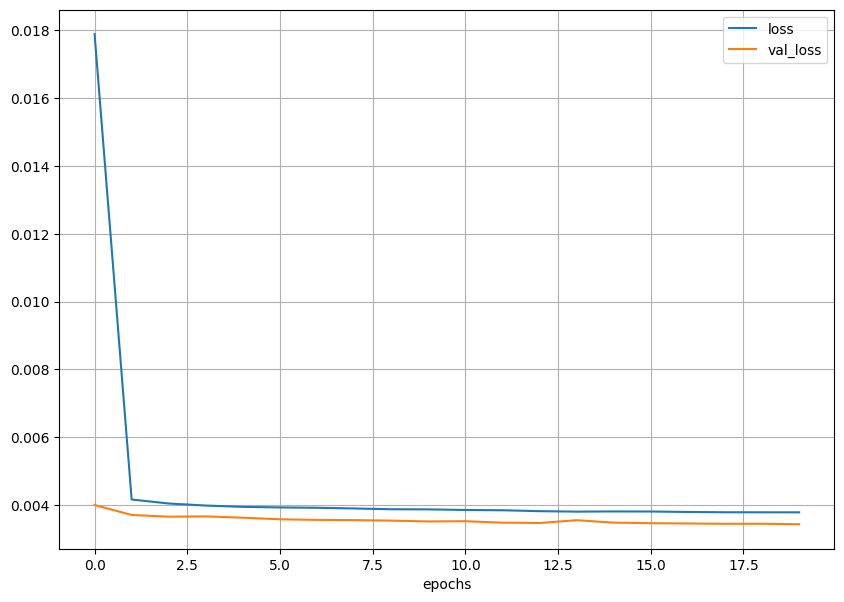

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame({'loss': history3.history['loss'],
              'val_loss': history3.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()

31250/31250 [==============================] - 53s 2ms/step


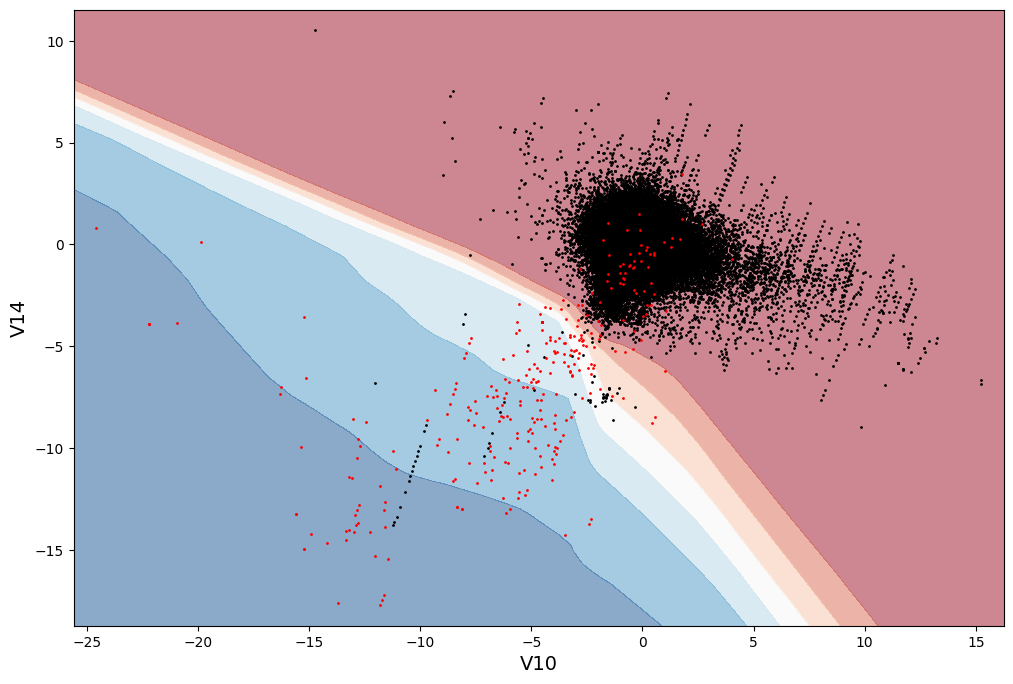

In [29]:
plt.figure(figsize=(12, 8))
plot_ann_decision_boundary(X_train_reduced.values, y_train, model3)
plt.show()

In [30]:
# Prediction with the train set
y_pred = model3.predict(X_train_reduced).round(0)

5341/5341 [==============================] - 8s 1ms/step


31250/31250 [==============================] - 51s 2ms/step


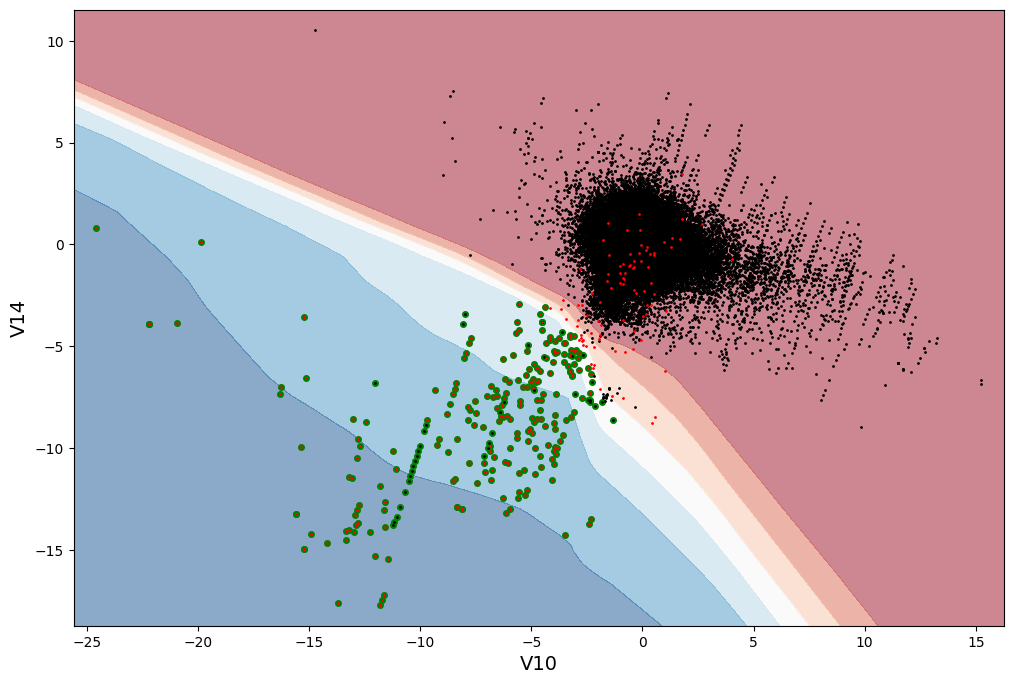

In [31]:
plt.figure(figsize=(12, 8))
plt.plot(X_train_reduced[y_pred==1]["V10"], X_train_reduced[y_pred==1]["V14"], 'go', markersize=4)
plot_ann_decision_boundary(X_train_reduced.values, y_train, model3)
plt.show()

In [32]:
# Prediction with the test set
y_pred = model3.predict(X_test_reduced).round(0)

1781/1781 [==============================] - 3s 1ms/step


In [33]:
from sklearn.metrics import f1_score

print("F1 Score:", f1_score(y_test, y_pred))

F1 Score: 0.8268156424581005
